<a href="https://colab.research.google.com/github/codewithharsha/DeepLearning/blob/main/ImageClassificationOnCIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models,layers,datasets

In [5]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [14]:
y_train = y_train.reshape(-1,)
y_train[5:]

array([1, 2, 7, ..., 9, 1, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [53]:
#function for plotting the imagegs based on index in the dataset
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.title(classes[y[index]])

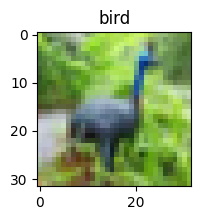

In [18]:
plot_sample(x_train,y_train,6)

In [19]:
#Feature Scaaling
x_train = x_train/255
x_test = x_test/255

In [22]:
# bulding a ANN
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann_model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
ann_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8149 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.6239 - accuracy: 0.4254
Epoch 3/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5396 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4797 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 190s 122ms/step - loss: 1.4293 - accuracy: 0.4983


In [30]:
y_pred = ann_model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 7s 24ms/step


In [32]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.75      0.42      0.54      1000
           2       0.25      0.64      0.36      1000
           3       0.38      0.27      0.31      1000
           4       0.56      0.20      0.29      1000
           5       0.39      0.41      0.40      1000
           6       0.63      0.35      0.45      1000
           7       0.55      0.55      0.55      1000
           8       0.57      0.66      0.61      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



In [33]:
#cnn model
cnn_model = models.Sequential([
    # extra CNN layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Usual Dense layers
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [34]:
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [35]:
cnn_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 36ms/step - loss: 1.5390 - accuracy: 0.4433
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2345 - accuracy: 0.5629
Epoch 3/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0990 - accuracy: 0.6151
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0188 - accuracy: 0.6430
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9611 - accuracy: 0.6656


In [42]:
y_pred = cnn_model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred_classes = [classes[i] for i in y_pred]

313/313 [==============================] - 3s 11ms/step


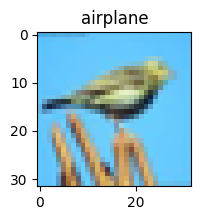

In [54]:
plot_sample(x_test,y_pred,67)